#### Загружаем библиотеки и датафреймы:

In [57]:
import pandas as pd

In [58]:
import matplotlib.pyplot as plt

In [59]:
import seaborn as sns

In [5]:
!pip install phik

In [6]:
pip install scipy phik

Note: you may need to restart the kernel to use updated packages.


In [108]:
! pip install scipy
import scipy.stats

In [109]:
from phik import phik_matrix

ModuleNotFoundError: No module named 'scipy.stats._mvn'

In [60]:
bank_df = pd.read_csv('C:/Users/User/Downloads/bank_information.csv')
clients_df = pd.read_csv('C:/Users/User/Downloads/clients_information.csv')

### Шаг 1. Получение общей информации о данных

In [61]:
bank_df.head()

,userid,score,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,2,NaN,1,1,1,101348.88,1
1,15690047,608,1,83807.86,1,0,1,112542.58,0
2,15662040,502,8,159660.80,3,1,0,113931.57,1
3,15744090,699,1,NaN,2,0,0,93826.63,0
4,15780624,850,2,125510.82,1,1,1,79084.10,0


In [62]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   Objects           10000 non-null  int64  
 3   Balance           6383 non-null   float64
 4   Products          10000 non-null  int64  
 5   CreditCard        10000 non-null  int64  
 6   Loyalty           10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   Churn             10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.2 KB


Датасет `bank_information.csv` содержит `9 столбцов` и `10000 строк`, в которых представлена информация об использовании клиентами услуг банка.

- Названия столбцов лучше привести к одному виду, например `snake case`.
- Все представленные данные содержат числовые значения и хранятся в типах данных `int64` или `float64`. Значения в столбцах `score`, `Objects`, `Products`, `CreditCard`, `Loyalty` и `Churn` представлены целыми числами. Часть их них показывает наличие у клиента того или иного признака и содержит значения 1 или 0 — размерность этих данных можно оптимизировать.
- Пропуски содержатся только в столбце `Balance`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [63]:
clients_df.head()

,userid,LastName,FirstName,Age,Gender,City
0,15677338,Лапина,Евпраксия,42,Ж,Ярославль
1,15690047,Александрова,Акулина,41,Ж,Рыбинск
2,15662040,Лаврентьева,Анна,42,Ж,Ярославль
3,15744090,Никитина,Олимпиада,39,Ж,Ярославль
4,15780624,Некрасова,Майя,43,Ж,Рыбинск


In [64]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userid     10000 non-null  int64 
 1   LastName   10000 non-null  object
 2   FirstName  10000 non-null  object
 3   Age        10000 non-null  int64 
 4   Gender     10000 non-null  object
 5   City       10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


Датасет `clients_information.csv` содержит `6 столбцов` и `10000 строк`, в которых представлена информация о клиентах банка.

- Типы данных соответствуют содержимому. Тип данных для столбца `Age` можно оптимизировать с понижением размерности. Если в столбце нет аномалий, то маловероятно, что он хранит высокие значения.
- Пропусков на первый взгляд нет, однако следует проверить в столбцах значения-индикаторы, которые могут говорить об отсутствии данных.
- Значения в столбцах соответствуют описанию.

### Шаг 2. Предобработка данных

#### Приведем названия столбцов к стилю `snake_case`:

In [65]:
# Напишем функцию для корректировки названия столбцов из CamelCase в snake_case
def col_to_snake_case(df):
    """
    Функция приводит названия столбцов из CamelCase в snake_case.
    Пример: столбец FirstName станет first_name.
    В качестве аргументов принимает датафрейм.
    Перебирает столбцы и проверяет каждый столбец.
    Если первый символ является заглавной буквой, то он меняется на прописную.
    Если в названии отыскиваются другие заглавные буквы, перед ними вставляется символ
    подчёркивания, и буква меняется на прописную.
    Функция возвращает исправленный датафрейм.
    """

    for col in df.columns:
        str_bad = col
        if str_bad[0].isupper():
            str_bad = str_bad[0].lower() + str_bad[1:]
        for index_s, item_s in enumerate(str_bad):
            if item_s.isupper():
                str_bad = str_bad[:index_s] + '_' + str_bad[index_s].lower() + str_bad[index_s + 1:]
        df = df.rename(columns={col: str_bad})
    return df

In [66]:
bank_df = col_to_snake_case(bank_df)

In [67]:
bank_df.columns

Index(['userid', 'score', 'objects', 'balance', 'products', 'credit_card',
       'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [68]:
clients_df = col_to_snake_case(clients_df)

In [69]:
clients_df. columns

Index(['userid', 'last_name', 'first_name', 'age', 'gender', 'city'], dtype='object')

#### Приведем числовые данные к оптимальному типу (`int8`)

In [70]:
# Оптимизируем целочисленный тип данных в датафрейме bank_df
for column in ['score','objects','products',
               'credit_card','loyalty','churn']:
    bank_df[column] = pd.to_numeric(bank_df[column],
                                    downcast='integer')

# Код автоматически подберет подходящий тип исходя из размера данных

# Оптимизируем целочисленный тип данных в датафрейме clients_df
clients_df['age'] = pd.to_numeric(clients_df['age'], downcast='integer')

#### Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски в столбце `balance` датафрейма `bank_df`. Узнаем абсолютное и относительное количество пропусков в этом столбце.

In [71]:
bank_df.isna().sum()

userid                 0
score                  0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [72]:
bank_df.isna().sum() / bank_df.shape[0]

userid              0.0000
score               0.0000
objects             0.0000
balance             0.3617
products            0.0000
credit_card         0.0000
loyalty             0.0000
estimated_salary    0.0000
churn               0.0000
dtype: float64

In [73]:
clients_df.isna().sum()

userid        0
last_name     0
first_name    0
age           0
gender        0
city          0
dtype: int64

В датафрейме `bank_df` обнаружено `3617 пропусков` в столбце `balance` — это `36% данных`. Количество пропусков достаточно большое, чтобы их просто удалить.

Чтобы разобраться с причиной пропусков, проанализируем возможные взаимосвязи пропусков с другими данными. Для этого добавим новый столбец-признак `is_balance`, который укажет на наличие пропуска в столбце `balance`.

In [74]:
# Определяем функцию, которая создаст новый столбец с бинарным признаком в зависимости от наличия данных в другом столбце
def create_is_na(x):
    """
    Функция создаёт новый столбец с бинарным признаком, который указывает
    на наличие данных в столбце. Функция применяется к столбцу после метода isna()
    """
    if x:
        return 0
    return 1 

In [75]:
# Создаём столбец is_balance с помощью функции create_is_na
bank_df['is_balance'] = bank_df['balance'].isna().apply(create_is_na) 

Сгруппируем данные по столбцу `is_balance` и посчитаем средние значения для остальных переменных:
- Для данных с дискретными признаками `objects` и `products` будем использовать медиану median. Для таких значений среднее может быть дробным числом, а медиана, как правило, будет числом целым, которое проще интерпретировать.
- Для непрерывных вещественных данных `score` и `estimated_salary` используем среднее mean, чтобы охарактеризовать типичное значение.
- Для бинарных данных `credit_card`, `loyalty` и `churn` также используем среднее значение mean — оно будет соответствовать доли значений с признаком 1.

In [76]:
# Проводим агрегацию данных по полю is_balance
bank_df.groupby('is_balance').agg({
    'score':'mean',
    'objects':'median',
    'products':'median',
    'credit_card':'mean',
    'loyalty':'mean',
    'churn':'mean',
    'estimated_salary':'mean'
})

,score,objects,products,credit_card,loyalty,churn,estimated_salary
is_balance,,,,,,,
0,649.452861,5.0,2.0,0.716616,0.517832,0.138236,98983.559549
1,651.138493,5.0,1.0,0.699201,0.513552,0.240796,100717.352956


Далее проверим, встречаются ли в данных значения-индикаторы, которые можно рассматривать как пропуски. 

Посмотрим на уникальные значения в ключевых данных:

In [77]:
for column in ['objects', 'products', 'credit_card', 'loyalty', 'churn']:
    print(f'Уникальные значения в столбце {column}:')
    print(bank_df[column].sort_values().unique())
    print()

Уникальные значения в столбце objects:
[ 0  1  2  3  4  5  6  7  8  9 10]

Уникальные значения в столбце products:
[1 2 3 4]

Уникальные значения в столбце credit_card:
[0 1]

Уникальные значения в столбце loyalty:
[0 1]

Уникальные значения в столбце churn:
[0 1]



#### Явные и неявные дубликаты в данных

In [78]:
# Проверяем полные (явные) дубликаты в датафрейме bank_df
bank_df.duplicated().sum()

0

In [79]:
clients_df.duplicated().sum() 

0

Проверим неявные дубликаты — значения по `id` клиентов должны быть уникальными, то есть каждая строка в данных — уникальный клиент:

In [80]:
bank_df.duplicated(subset='userid').sum() 

0

In [81]:
clients_df.duplicated(subset='userid').sum() 

0

In [82]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['gender', 'city']:
    print(f'Уникальные значения в столбце {column}:')
    print(clients_df[column].sort_values().unique())
    print() 

Уникальные значения в столбце gender:
['Ж' 'М']

Уникальные значения в столбце city:
['Ростов Великий' 'Рыбинск' 'Ярославль']



**В результате предобработки данных были выполнены следующие действия:**
- Скорректированы названия столбцов — их привели к стилю `snake_case`;
- Изучены пропуски в данных. Пропуски обнаружились в столбце `balance` и составляют около 36% данных столбца. Учитывая это количество, пропуски могут отражать особенности использования услуг клиентами и не являться ошибкой в данных. Поэтому их оставили как есть.
- Данные проверили на явные и неявные дубликаты — в данных их нет.

### Шаг 3. Визуальный анализ данных

In [83]:
# Соединяем данные в единый датафрейм df
df = bank_df.merge(clients_df, on='userid') 

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int16  
 2   objects           10000 non-null  int8   
 3   balance           6383 non-null   float64
 4   products          10000 non-null  int8   
 5   credit_card       10000 non-null  int8   
 6   loyalty           10000 non-null  int8   
 7   estimated_salary  10000 non-null  float64
 8   churn             10000 non-null  int8   
 9   is_balance        10000 non-null  int64  
 10  last_name         10000 non-null  object 
 11  first_name        10000 non-null  object 
 12  age               10000 non-null  int8   
 13  gender            10000 non-null  object 
 14  city              10000 non-null  object 
dtypes: float64(2), int16(1), int64(2), int8(6), object(4)
memory usage: 781.2+ KB


In [85]:
# Проверяем распределение данных по значениям столбца objects
print('Распределение данных по значениям столбца objects:')
df['objects'].value_counts()

Распределение данных по значениям столбца objects:


2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

Все значения в столбце примерно сопоставимы по количеству данных, за исключением двух категорий, где данных в два раза меньше (0 и 10 объектов). Это стоит учитывать при сравнении статистических показателей разных категорий.

Так как в татафрейме каждая строчка - это уникальная запись о клиенте, эту же таблицу можно получить и другим методом:

In [86]:
# Посчитаем количество уникальных клиентов для каждого значения столбца objects
print('Распределение клиентов по значениям столбца objects:')
df.groupby('objects')['userid'].nunique()

Распределение клиентов по значениям столбца objects:


objects
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: userid, dtype: int64

In [87]:
# Проверяем распределение данных по значениям столбца products
print('Распределение данных по значениям столбца products:')
df['products'].value_counts() 

Распределение данных по значениям столбца products:


1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

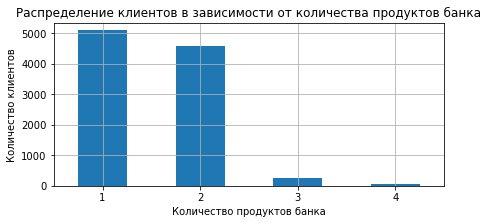

In [88]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['products'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение клиентов в зависимости от количества продуктов банка'
)

# Настраиваем оформление графика
plt.xlabel('Количество продуктов банка')
plt.ylabel('Количество клиентов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [89]:
# Изучим статистические показатели столбца balance
print('Статистические показатели столбца balance:')
df['balance'].describe()

Статистические показатели столбца balance:


count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

Можно предположить, что данные баланса имеют распределение, близкое к нормальному. Об этом говорит близость среднего и медианного значений. Однако значение стандартного отклонения довольно высокое — **30095.06**, и при среднем **119827.49** это указывает, что данные могут иметь широкий разброс. Разница между минимальным и максимальным значениями это подтверждает. В дополнение построим гистограмму:

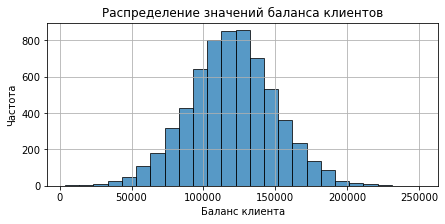

In [90]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['balance'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений баланса клиентов')
plt.xlabel('Баланс клиента')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

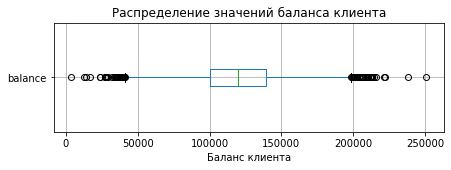

In [91]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
df.boxplot(column='balance', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений баланса клиента')
plt.xlabel('Баланс клиента')

# Выводим график
plt.show() 

Распределение данных действительно выглядит нормальным, однако характеризуется широким разбросом и «хвостами» как в левой, так и в правой части гистограммы. Такие низкие и высокие значения можно отнести к выбросам. Однако сами значения, как минимальные, так и максимальные, не выглядят ошибкой, и такой баланс у клиента вполне допустим. Поэтому при анализе данных их оставим.

Тоже самое делаем для стобца `score`:

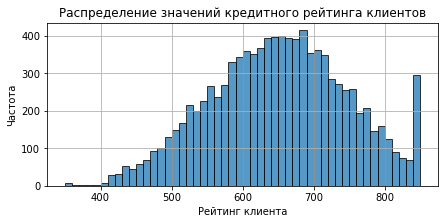

In [92]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))


df['score'].plot(
                kind='hist',
                bins=50, 
                alpha=0.75,
                edgecolor='black',
                rot=0)

# Настраиваем оформление графика
plt.title('Распределение значений кредитного рейтинга клиентов')
plt.xlabel('Рейтинг клиента')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

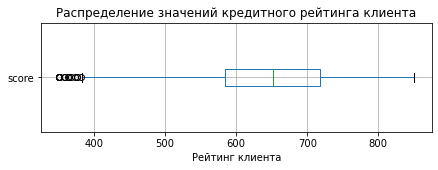

In [93]:
plt.figure(figsize=(7, 2))

df.boxplot(column='score', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений кредитного рейтинга клиента')
plt.xlabel('Рейтинг клиента')

# Выводим график
plt.show()

На гистограмме видно, что распределение значений в столбце score приближается к нормальному, но резко увеличивается количество высоких значений, близких к 850. Такой пик может означать, что 850 — это значение-индикатор, которое отражает пропуски. Например, у таких клиентов может не быть кредитного рейтинга, так как ранее они не оформляли кредиты. Может быть и другое объяснение. Допустим, кредитный рейтинг клиента составляет больше 850. Если значение 850 является максимальным, то всем клиентам с рейтингом выше может присваиваться значение 850.

Проверим эту особенность данных отдельно и изучим распределение данных для значений рейтинга от 840 до 850:

In [94]:
# Проверяем распределение данных по значениям столбца score 840 и выше
print('Распределение данных по значениям столбца score 840 и выше:')
df.loc[df['score'] >= 840]['score'].value_counts() 

Распределение данных по значениям столбца score 840 и выше:


850    233
841     12
849      8
842      7
844      7
845      6
847      6
846      5
840      5
848      5
843      2
Name: score, dtype: int64

Действительно, данных с рейтингом 850 значительно больше, чем с рейтингом от 840 до 849. Это может подтвердить одну из предложенных гипотез.

Проверяем значения в столбце `estimated_salary`:

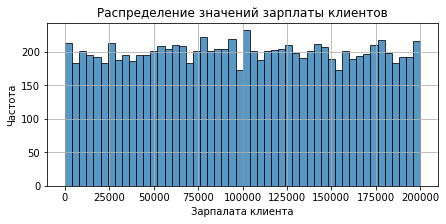

In [95]:
plt.figure(figsize=(7, 3))

df['estimated_salary'].plot(
                kind='hist',
                bins=50, 
                alpha=0.75,
                edgecolor='black',
                rot=0)

# Настраиваем оформление графика
plt.title('Распределение значений зарплаты клиентов')
plt.xlabel('Зарпалата клиента')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

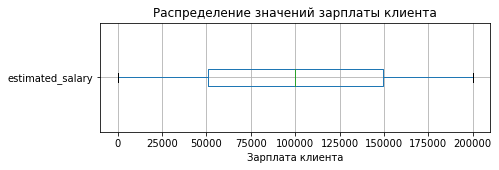

In [96]:
plt.figure(figsize=(7, 2))

df.boxplot(column='estimated_salary', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений зарплаты клиента')
plt.xlabel('Зарплата клиента')

# Выводим график
plt.show()

Проверяем значения в столбце `age`:

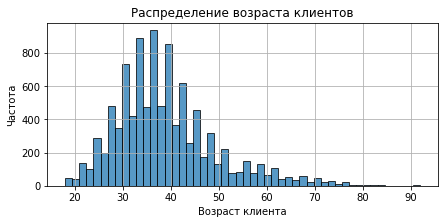

In [97]:
plt.figure(figsize=(7, 3))

df['age'].plot(
                kind='hist',
                bins=50, 
                alpha=0.75,
                edgecolor='black',
                rot=0)

# Настраиваем оформление графика
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст клиента')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

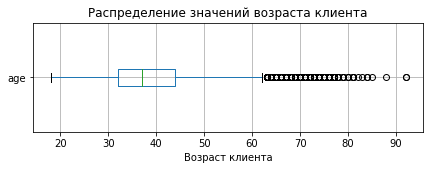

In [98]:
plt.figure(figsize=(7, 2))

df.boxplot(column='age', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений возраста клиента')
plt.xlabel('Возраст клиента')

# Выводим график
plt.show()

Значения явно смещены влево с медианным значением в районе **35 лет** с длинным правым хвостом. Можно отметить наличие аномального значения после отметки в **90 лет**

In [99]:
# Проверяем распределение данных по значениям в столбце
for column in ['credit_card','loyalty','churn']:
    print(f'Распределение данных по значениям столбца {column}:')
    print(df[column].value_counts(normalize=True))
    print()

Распределение данных по значениям столбца credit_card:
1    0.7055
0    0.2945
Name: credit_card, dtype: float64

Распределение данных по значениям столбца loyalty:
1    0.5151
0    0.4849
Name: loyalty, dtype: float64

Распределение данных по значениям столбца churn:
0    0.7963
1    0.2037
Name: churn, dtype: float64



Распределение значений в столбцах `gender` и `city` рассмотрим с помощью столбчатой диаграммы:

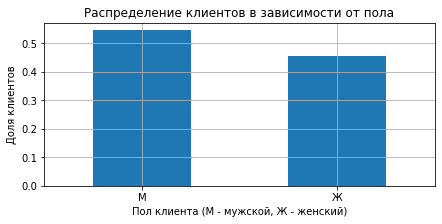

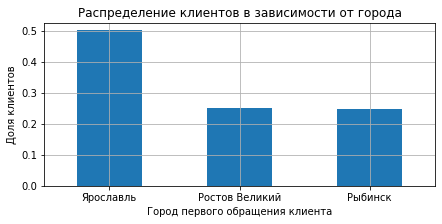

In [100]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['gender'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика — столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение клиентов в зависимости от пола'
)

# Настраиваем оформление графика
plt.xlabel('Пол клиента (М - мужской, Ж - женский)')
plt.ylabel('Доля клиентов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['city'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение клиентов в зависимости от города'
)

# Настраиваем оформление графика
plt.xlabel('Город первого обращения клиента')
plt.ylabel('Доля клиентов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Примерно 55% клиентов — мужчины. Половина клиентов представляют Ярославль, а остальная половина — Ростов Великий и Рыбинск примерно поровну.

### Шаг 4. Анализ закономерностей

In [101]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['objects', 'products', 'balance', 'estimated_salary', 'score',
                         'credit_card', 'loyalty', 'is_balance', 'age',
                         'gender', 'city', 'churn']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной churn')
correlation_matrix.loc[correlation_matrix.index != 'churn'][['churn']].sort_values(by='churn', ascending=False)

AttributeError: 'DataFrame' object has no attribute 'phik_matrix'

Нас интересует связь оттока клиента с другими данными, поэтому на экран был выведен только столбец churn итоговой матрицы корреляции `correlation_matrix`.  Условие `correlation_matrix.loc[correlation_matrix.index != 'churn']` помогает убрать строку с индексом `'churn'`, которая хранит корреляцию churn с самим собой.

визуализируем результат корреляции с помощью тепловой карты и библиотеки `seaborn`:

In [102]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'churn'][['churn']].sort_values(by='churn', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных churn')
plt.xlabel('Отток клиента')

# Выводим график
plt.show()

NameError: name 'correlation_matrix' is not defined

<Figure size 144x432 with 0 Axes>

Изучим, существует ли зависимость между уходом клиента из банка и городом первого обращения. Для этого построим столбчатые диаграммы с разделением по признаку `churn` среди разных городов:

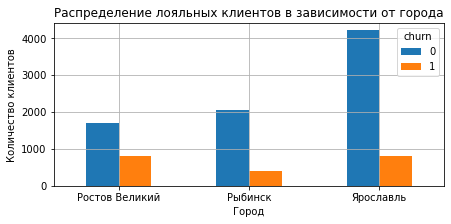

In [103]:
# Построим график столбчатой диаграммы
grouped = df.groupby('city')['churn'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar',
               title=f'Распределение лояльных клиентов в зависимости от города',
               legend=True,
               ylabel='Количество клиентов',
               xlabel='Город',
               rot=0,
               figsize=(7, 3))
plt.grid()

# Выводим график
plt.show()

Для большей наглядности посчитаем доли для каждого города:

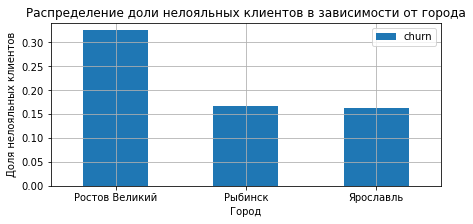

In [104]:
grouped = df.groupby('city')['churn'].mean()
grouped.plot(kind='bar',
               title=f'Распределение доли нелояльных клиентов в зависимости от города',
               legend=True,
               ylabel='Доля нелояльных клиентов',
               xlabel='Город',
               rot=0,
               figsize=(7, 3))
plt.grid()

# Выводим график
plt.show() 

Добавим на график линию, которая будет показывать среднее значение. Чтобы на график matplotlib добавить горизонтальную линию, можно использовать метод `axhline()` — в качестве первого аргумента он принимает значение по оси Y, по которому будет строиться горизонтальная линия:

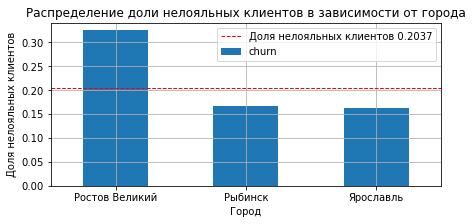

In [105]:
# Строим график столбчатой диаграммы
grouped = df.groupby('city')['churn'].mean()
grouped.plot(kind='bar',
               title=f'Распределение доли нелояльных клиентов в зависимости от города',
               legend=True,
               ylabel='Доля нелояльных клиентов',
               xlabel='Город',
               rot=0,
               figsize=(7, 3))

# Рассчитываем среднее значение по доле нелояльных клиентов
mean_churn_share = df['churn'].mean()

# Наносим на график линию с средним значением доли нелояльных клиентов
plt.axhline(mean_churn_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Доля нелояльных клиентов {round(mean_churn_share,4)}')

plt.grid()
plt.legend()

# Выводим график
plt.show()

Из кода для графика можно сделать функцию, ведь подобный анализ будет выполняться и для других признаков:

In [106]:
# Задаём функцию для анализа данных
def plot_bar_plot(df, groupby, value, aggfunc, title, ylabel, xlabel):
    '''
    Функция для анализа распределения метрики по признакам:
    df - датафрейм с данными для анализа;
    groupby - str, название столбца для группировки данных;
    value - str, название столбца, значение которого будет агрегироваться;
    aggfunc - str, функция агрегации, которая используется для расчёта;
    title - str, заголовок графика;
    ylabel - str, подпись по оси Y;
    xlabel - str, подпись по оси X.
    '''
    grouped = df.groupby(groupby).agg({value:aggfunc})
    grouped.plot(kind='bar',
                   title=title,
                   legend=True,
                   ylabel=ylabel,
                   xlabel=xlabel,
                   rot=0,
                   figsize=(7, 3))

    # Рассчитываем общее значение value по всем данным
    mean_churn_share = df.agg({value:aggfunc})[0]

    # Наносим на график линию с значением value по всем данным
    plt.axhline(mean_churn_share, color='red',
                linestyle='--', linewidth=1,
                label=f'Значение по всем данным {round(mean_churn_share,4)}')

    plt.grid()
    plt.legend()
    plt.show() 

Применим функцию и изучим распределение доли нелояльных клиентов в зависимости от количества объектов собственности `objects`:

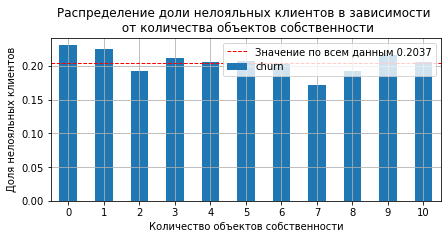

In [107]:
title='Распределение доли нелояльных клиентов в зависимости \n от количества объектов собственности'
xlabel='Количество объектов собственности'
ylabel='Доля нелояльных клиентов'

plot_bar_plot(df, 'objects', 'churn', 'mean', title, ylabel, xlabel)

**Изучаем числовые непрерывные данные**

Теперь перейдём к непрерывным числовым данным и изучим гистограммы распределения возраста в разрезе лояльных и нелояльных клиентов. У клиента может быть два признака лояльности: он либо ушёл из банка, либо нет. Поэтому в `matplotlib` необходимо построить два графика по разным значениям признака `churn`. Удобно это сделать в цикле, который будет строить два графика в зависимости от `churn`. Чтобы не прописывать значение `churn` вручную, используем метод `unique()` для определения уникальных значений:

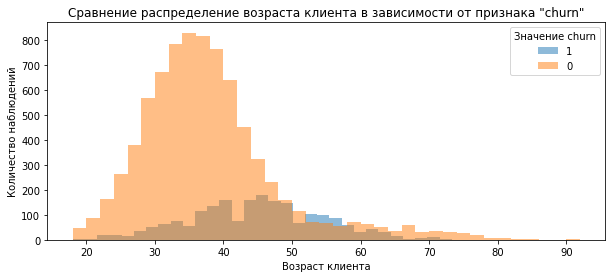

In [110]:
# Строим гистограмму распределения значений возраста
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения churn
for i in df['churn'].unique():
    # Фильтруем данные по значению столбца churn
    df.loc[df['churn'] == i, 'age'].plot(
        kind='hist',
        bins=37,
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение возраста клиента в зависимости от признака "churn"')
plt.xlabel('Возраст клиента')
plt.ylabel('Количество наблюдений')
plt.legend(title='Значение churn')
plt.show()

Для более информативного представления данных добавили прозрачность alpha=0.5. По графику видно, что значений для лояльных клиентов больше, чем для нелояльных, поэтому два распределения имеют разную высоту. Из-за этого сопоставлять их не очень удобно.
Когда сравниваемые выборки неравномерны по количеству наблюдений, для сравнения их распределений можно построить плотность вероятности. Тогда высота каждого столбца будет нормирована таким образом, что сумма площадей всех столбцов будет равна 1. Таким способом удобнее сравнивать выборки разного размера. Для этого установим аргумент `density=True`:

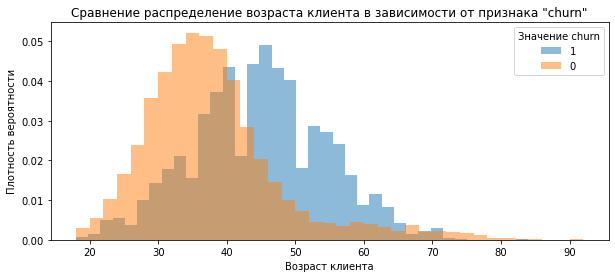

In [111]:
# Строим гистограмму распределения значений возраста
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения churn
for i in df['churn'].unique():
    # Фильтруем данные по значению столбца churn
    df.loc[df['churn'] == i, 'age'].plot(
        kind='hist',
        density=True,
        bins=37,
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение возраста клиента в зависимости от признака "churn"')
plt.xlabel('Возраст клиента')
plt.ylabel('Плотность вероятности')
plt.legend(title='Значение churn')
plt.show()

Теперь распределения двух выборок сопоставимы между собой. Можно заметить, что распределение выборки с признаком churn=1 смещено в область более высоких значений.
Обратите внимание, что сейчас размеры интервалов, или корзин, различаются для разных данных. Лучше сделать их в едином масштабе с заданной шириной, например в два года. Для этого нужно скорректировать параметр bins — задать минимальное значение, максимальное значение и шаг. Минимальное и максимальное значения можно взять из общих данных, а шаг задать в два года. Сначала найдём минимальное и максимальное значения:

In [112]:
# Находим минимальное и максимальное значения
min_value = df['age'].min()
max_value = df['age'].max()

Значение параметра bins пропишем как интервал от минимального к максимальному значению с шагом 2: bins=range(min_value, max_value+1, 2). Здесь +1 нужно для того, чтобы увеличить интервал значений, ведь функция range() не использует последнее значение в интервале:

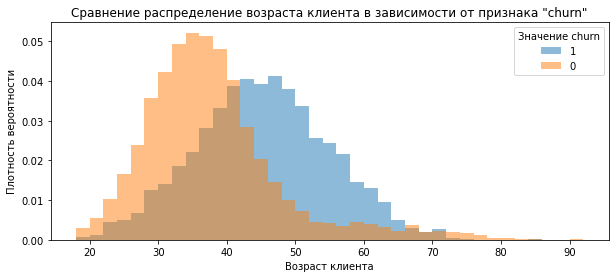

In [113]:
# Строим гистограмму распределения значений возраста
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения churn
for i in df['churn'].unique():
    # Фильтруем данные по значению столбца churn
    df.loc[df['churn'] == i, 'age'].plot(
        kind='hist',
        density=True,
        bins=range(min_value, max_value+1, 2),
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение возраста клиента в зависимости от признака "churn"')
plt.xlabel('Возраст клиента')
plt.ylabel('Плотность вероятности')
plt.legend(title='Значение churn')

plt.show()

Дополнительно вместо гистограммы можно использовать график `KDE` — оценку функции плотности вероятности для непрерывных данных. KDE представляет гладкую линию, которая показывает вероятность встретить значения в определённом диапазоне. Чем выше линия располагается на графике, тем больше вероятность встретить подобное значение. Сравнение линий `KDE` двух распределений помогает выявить различия между ними.
Для построения графика KDE можно использовать метод `plot()` c аргументом `kind='kde'`. Модифицируем предыдущий код и построим визуализацию `KDE`:

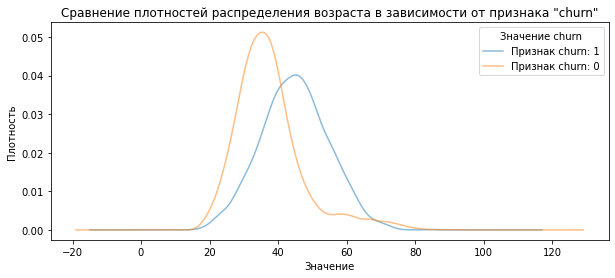

In [114]:
# Строим гистограмму распределения значений возраста
column = 'age'

# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения churn
for i in df['churn'].unique():
    # Фильтруем данные по значению столбца churn
    df.loc[df['churn'] == i, column].plot(
        kind='kde',
        alpha=0.5,
        label=f'Признак churn: {i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение плотностей распределения возраста в зависимости от признака "churn"')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend(title='Значение churn')
plt.show() 

Для более детального анализа данных рассчитаем среднее и медианное значения возраста для лояльных и нелояльных клиентов:

In [115]:
df.groupby('churn').agg({'age':['mean','median']})

age       
            mean median
churn                  
0      37.408389   36.0
1      44.837997   45.0

На основе написанного кода создадим функцию для визуализации данных:

In [116]:
def plot_hist(df, column, groupby, title, xlabel, ylabel, binwidth, kde=False):
    '''
    Функция для визуализации распределения значений с учётом категорий и линией KDE.
    Параметры:
    df - датафрейм с данными для анализа.
    column - str, название столбца, значения которого будут отображаться на графике.
    groupby - str, название столбца, по которому будет производиться группировка данных.
    binwidth - int, ширина корзины для гистограммы.
    title - str, заголовок графика.
    xlabel - str, подпись по оси X.
    ylabel - str, подпись по оси Y.
    kde - наложение графика KDE на гистограмму
    '''

    # Создаём график
    plt.figure(figsize=(7, 3))

    # Находим минимальное и максимальное значения
    min_value = int(df[column].min())
    max_value = round(df[column].max())

    for value in df[groupby].unique():
        # Фильтруем данные по значению столбца churn
        df.loc[df[groupby] == value, column].plot(
            kind='hist',
            density=True,
            bins=range(min_value, max_value+1, binwidth),
            alpha=0.5,
            label=f'{groupby}: {value}',
            legend=True
        )

    for value in df[groupby].unique():
        if kde == True:
            df.loc[df[groupby] == value, column].plot(
                kind='kde',
                label=f'KDE {value}',
            )

    # Настраиваем график
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.xlim(min_value, max_value)

    plt.grid()
    plt.show()

Посмотрим на распределение значений баланса клиента:

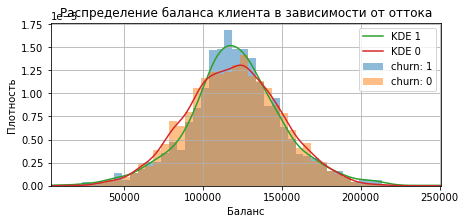

In [117]:
# Изучаем распределение значений баланса клиентов в зависимости от их лояльности
plot_hist(
    df=df,
    column='balance',
    groupby='churn',
    binwidth=5000,
    title='Распределение баланса клиента в зависимости от оттока',
    xlabel='Баланс',
    ylabel='Плотность',
    kde=True
)

Распределение значений баланса лояльных и нелояльных клиентов примерно равно. Предполагаем, что баланс вряд ли играет определяющую роль при уходе клиента из банка.


**Поиск закономерностей с помощью диаграммы рассеяния**

Посмотрим на взаимосвязь между возрастом и балансом клиента:

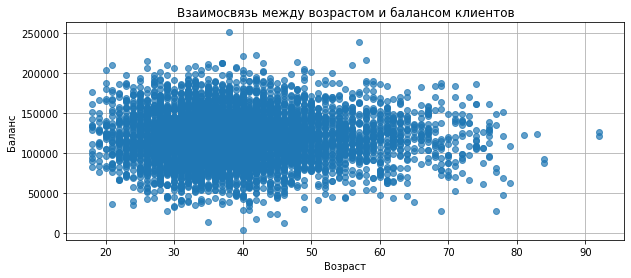

In [118]:
# Создаём контейнер графика
plt.figure(figsize=(10, 4))

# Строим линейный график
plt.plot(df['age'],
         df['balance'],
         marker='o', # Задаём стиль маркера
         linestyle='', # Делаем линии между точками невидимыми
         alpha=0.7)

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между возрастом и балансом клиентов')
plt.xlabel('Возраст')
plt.ylabel('Баланс')
plt.grid()

# Отображаем график
plt.show()

Посмотрим на связи с признаком лояльности клиента:

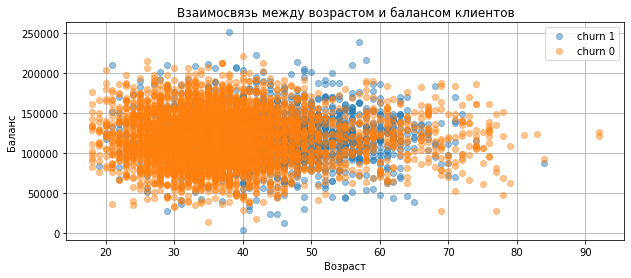

In [119]:
# Создаём контейнер графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения churn
for i in df['churn'].unique():
    # Фильтруем данные по значению столбца churn
    plot_data = df.loc[df['churn'] == i]

    # Строим линейный график
    plt.plot(plot_data['age'],
             plot_data['balance'],
             marker='o', # Задаём стиль маркера
             linestyle='', # Делаем линии между точками невидимыми
             label=f'churn {i}',
             alpha=0.45)

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между возрастом и балансом клиентов')
plt.xlabel('Возраст')
plt.ylabel('Баланс')
plt.legend()
plt.grid()

# Отображаем график
plt.show() 

Нелояльные клиенты образуют облако точек в центральной части диаграммы — это преобладающий интервал возраста, который составляет 40–60 лет. Однако никакой видимой закономерности от баланса и на этом графике нельзя зафиксировать.
